In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import time
import numpy as np
import plotly.express as px
from utils import *

torch.manual_seed(10)


weight_penalty_coefficient = 0.01

input_size = 20
hidden_layer_size= 5
output_size = input_size
learning_rate = 0.01
max_iters = 1000
dataset_size = 1024*32
sparsity = 0.1
batch_size = 32

decay_factor = 0.95
iters = []
loss_value = []
val_loss_value = []

imp_vector =torch.tensor([0.9**i for i in range(input_size)])
#imp_vector = torch.rand(input_size)
#imp_vector = torch.ones(input_size, device= DEVICE)


def sample_data(split = 'train'):
    if split != 'train':
        curr_data = validation_dataset
    else:
        curr_data = training_dataset
    sparsity_vector = sparsity
    a, b = curr_data.shape
    
    #sparsity_vector = torch.tensor(sparsity_vector, device=curr_data.device)
    sparsity_vector = pow(10, torch.normal(-1, 1, size=(1, 20)))
    sparsity_vector = sparsity_vector.view(1, -1)
    print(sparsity_vector)
    sparsity_mat = torch.bernoulli(torch.full((a, b), 1.0) * sparsity_vector)
    
    X = curr_data * sparsity_mat
    return X, X


        

training_dataset = torch.rand(dataset_size, input_size)
validation_dataset = torch.rand(int(dataset_size/2), input_size)
output = input


model = SuperpositionModel(SuperPositionConfig(input_size, hidden_layer_size, imp_vector))

LOAD_MODEL = False
PATH = "models/basic_linear_0.99.bin"
if LOAD_MODEL:
    model = SuperpositionModel(SuperPositionConfig())
    model.load_state_dict(torch.load(PATH))
    model.eval()
else:
    optimizer = torch.optim.Adam(model.parameters() , learning_rate, weight_decay= 1e-5)
    start_time = time.time()
    step_value = max_iters/20
    for i in range(1, max_iters):
        X, Y = sample_data()
        logits, loss, _ = model(X, Y)
    
        if i%step_value ==0 :
            model.eval()
            with torch.no_grad():
                X_V,Y_V = sample_data(split = 'val')
                _, val_loss, _ = model(X_V, Y_V)
                iters.append(i)
                loss_value.append(loss.item())
                val_loss_value.append(val_loss.item())
                print(f"iter:{i} training loss: {loss.item()}, val loss: {val_loss.item()}")
            model.train()

        optimizer.zero_grad(set_to_none=True)
        #loss+= get_l1_penalty()
        loss.backward()
        optimizer.step()


    end_time = time.time()
    print(f"Took {end_time-start_time}s for {max_iters} epochs")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(iters,loss_value, color='blue', label="Training")
    plt.plot(iters, val_loss_value, "red", label = "validation")
    plt.legend()
    plt.show()

tensor([[2.7420e-01, 1.9290e-01, 1.1353e+00, 6.5124e-02, 1.9535e-02, 8.7157e-02,
         4.3783e-02, 3.6335e-02, 8.8529e-03, 3.0486e-03, 3.6956e-02, 9.7253e+00,
         5.5649e-01, 1.4636e+00, 4.3128e-01, 9.9528e-03, 1.6832e-01, 1.7889e-01,
         4.0821e+01, 1.6133e-01]])


RuntimeError: Expected p_in >= 0 && p_in <= 1 to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.)

In [4]:
encoder_w = model.encoder.weight.data
decoder_w = model.decoder.weight.data

imshow(encoder_w.t())
# visualise_tensor(decoder_w.t())
imshow(decoder_w@encoder_w)
# visualise_tensor(model.decoder.bias.data.reshape(-1,1))

In [5]:
data = torch.tensor([])
original = torch.tensor([])
for i in range(10):
    x,y = sample_data()
    original = torch.cat((original, x))
    _,_,hidden = model(x,x)
    data = torch.cat((data,hidden))
    

torch.save(data, "data/hidden.pt")
torch.save(original, "data/original.pt")
PATH = "models/superpositon.pt"

torch.save(model.state_dict(), PATH)



In [39]:
LOAD_MODEL = False


In [8]:
model = SuperpositionModel(SuperPositionConfig(input_size, hidden_layer_size, imp_vector))

In [10]:
a, b, c = model(X,X)

In [12]:
b.shape

torch.Size([])

In [20]:
a.shape

torch.Size([65536, 20])

In [9]:
torch.rand(10)

tensor([0.6576, 0.5636, 0.9348, 0.4211, 0.1432, 0.0944, 0.8426, 0.0601, 0.8363,
        0.3298])

In [4]:
training_dataset.device

device(type='cpu')

In [8]:
torch.cpu == training_dataset.device

False

In [11]:
torch.normal(-2, 1, size=(1, 20))

tensor([[-2.3713, -5.1133, -2.3808, -3.0291, -1.5024, -1.5085, -1.1925, -3.0090,
         -3.1542, -1.5755, -1.3487,  0.0472, -3.6088, -0.8597, -1.7032, -2.5679,
         -1.9966, -2.5258, -3.4489, -1.4714]])

tensor([[3.0142e-05, 2.6580e-03, 8.4314e-03, 2.2055e-02, 3.8710e-03, 5.9230e+00,
         4.5272e-02, 1.2567e-02, 1.8150e-01, 6.6038e-03, 1.9184e-02, 3.0966e-02,
         8.5086e-03, 1.5987e-02, 1.0973e-02, 4.7325e-02, 4.6843e-04, 1.9590e-01,
         3.9503e-03, 1.5151e-01]])

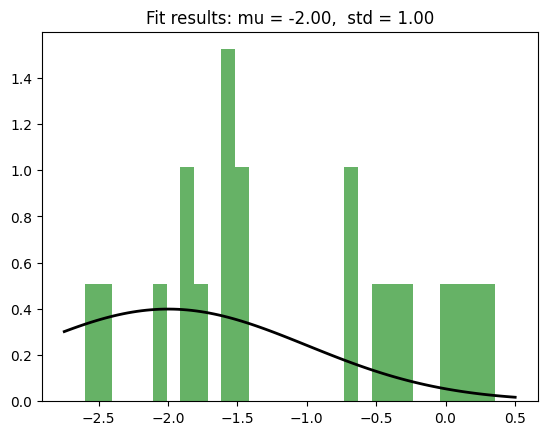

In [21]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Generate a larger set of data points
data = torch.normal(-1, 1, size=(1, 20))

# Convert to numpy array
data_numpy = data.numpy()

# Create a histogram of the data
plt.hist(data_numpy[0], bins=30, density=True, alpha=0.6, color='g')

# Optionally, plot the theoretical PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-((x - -2)**2) / (2 * 1**2)) / (np.sqrt(2 * np.pi * 1**2))
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (-2, 1)
plt.title(title)

plt.show()
